## Activity: Obtain confusion matrix, accuracy, precision, recall for pima Diabetes dataset
1. Load the dataset: `pd.read_csv('diabetes.csv')`
1. Use these features: `feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']`
1. Split the data to train and test: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)`
1. Instantiate logistic regression model
1. ~~Obtain the statistics of `y_test`~~
1. Obtain the confuction matrix

https://www.ritchieng.com/machine-learning-evaluate-classification-model/

### Step 1

In [153]:
# load the dataset
import pandas
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split

data = pandas.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Step 2

In [108]:
# use particular features from the table (check headers)
features = ['Pregnancies', 'Insulin', 'BMI', 'Age']

# X is a matrix, access the features we want in feature_cols
X = data[feature_cols]
# Y is a vector, hence we use dot to access 'label'
Y = data['Outcome']
# T is test size, a percent
T = 0.25

In [109]:
X.head()

,Pregnancies,Insulin,BMI,Age
0,6,0,33.6,50
1,1,0,26.6,31
2,8,0,23.3,32
3,1,94,28.1,21
4,0,168,43.1,33


### Step 3

In [110]:
# split X and y into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=T, random_state=0)
neg_y = Y_test.value_counts()[0]
pos_y = Y_test.value_counts()[1]
print('NOT SICK:', neg_y)
print('    SICK:', pos_y)

NOT SICK: 130
    SICK: 62


In [111]:
# check the size of Y_train
try:
	assert(int(len(Y_train)) == int(len(data) * (1-T)))
except:
	print('!WARNING!\n size doesnt match')
else:
	print('train data is OK')

try:
	assert(int(len(Y_test)) == int(len(data) * T))
except:
	print('!WARNING!\n size doesnt match')
else:
	print('test data is OK')

train data is OK
test data is OK


### Step 4

In [112]:
from sklearn.linear_model import LogisticRegression

# get model
model = LogisticRegression()

# fit model
model.fit(X_train, Y_train)

/Users/nolansmac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [152]:
# Y_pred = model.predict(X_test)
Y_pred = model.predict_proba(X_test).T
print(Y_pred)

[[0.63247571 0.71643656 0.71104114 0.5858938  0.84103973 0.82934844
  0.50110974 0.48658459 0.72321388 0.32810562 0.64244443 0.25912035
  0.63949765 0.76987637 0.57345769 0.80896485 0.54236399 0.8809859
  0.56071047 0.63038849 0.55812011 0.62388338 0.80183978 0.58322696
  0.84451719 0.7468329  0.90256923 0.30366288 0.84641691 0.7802164
  0.56905168 0.65783942 0.77603886 0.61926457 0.86657866 0.61209784
  0.52950297 0.83795257 0.70451824 0.69081839 0.72700295 0.61183417
  0.72646557 0.71118959 0.36528086 0.97634749 0.84179352 0.76981625
  0.6515407  0.72419959 0.66735896 0.75119404 0.25510488 0.60998536
  0.58374455 0.86424313 0.81104624 0.35222318 0.81077869 0.94314096
  0.36008453 0.53363618 0.8749028  0.73042398 0.75080896 0.69429604
  0.53623776 0.79036905 0.57152171 0.59237736 0.79830904 0.72972934
  0.73744144 0.42761737 0.54532959 0.72283848 0.41998719 0.58400512
  0.72723899 0.65900777 0.45373422 0.62069277 0.7007795  0.89940831
  0.67127398 0.54898637 0.83963021 0.5103025  0.36

In [128]:
# T is transpose
print(Y_test.values)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


### Step 6

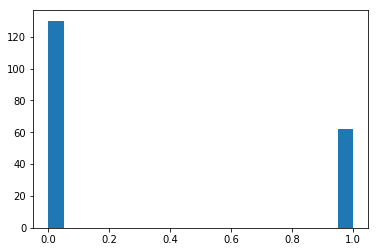

0    130
1     62
Name: Outcome, dtype: int64

In [124]:
plot.hist(Y_test, bins=20)
plot.show()

Y_test_pandas_series = pandas.Series(Y_test)
Y_test_pandas_series.value_counts()

## Activity: Write a function that calculates&hellip;
- How many of 0 (no diabetes) in y_test is predicted correctly as 0 (no diabetes) in y_pred?
- How many of 0 (no diabetes) in y_test is predicted incorrectly as 1 (diabetes) in y_pred?
- How many of 1 (diabetes) in y_test is predicted incorrectly as 0 (no diabetes) in y_pred?
- How many of 1 (diabetes) in y_test is predicted correctly 1 (diabetes) in y_pred?

| CONFUSION     | predict positive | predict negative |
|---------------|------------------|------------------|
| **positive**  | positive result  | false negative   |
| **negative**  | false positive   | negative result  |

In [140]:
def extract_pos_neg(actual, predict):
	positive = 0
	negative = 0
	false_pos = 0
	false_neg = 0
	for index in range(0, len(actual)):
		if actual[index] == 0 and predict[index] == 0:
			negative += 1
		elif actual[index] == 1 and predict[index] == 0:
			false_neg += 1
		elif actual[index] == 0 and predict[index] == 1:
			false_pos += 1
		elif actual[index] == 1 and predict[index] == 1:
			positive += 1
	return positive, negative, false_pos, false_neg

In [149]:
predict = Y_pred
actual = Y_test.values

pos, neg, not_pos, not_neg = extract_pos_neg(actual, predict)

print(' positive:', pos)
print(' negative:', neg)
print('false_pos:', not_pos)
print('false_neg:', not_neg)

 positive: 15
 negative: 118
false_pos: 12
false_neg: 47


In [150]:
def positive_accuracy(positive, false_pos):
	return positive / (positive + false_pos)

def negative_accuracy(negative, false_neg):
	return negative / (negative + false_neg)

def overall_accuracy(positive, negative, false_pos, false_neg):
	return (positive + negative) / (positive + negative + false_pos + false_neg)

print('pos acc:', positive_accuracy(pos, not_pos))
print('neg acc:', negative_accuracy(neg, not_neg))
print('ttl acc:', overall_accuracy(pos, neg, not_pos, not_neg))

pos acc: 0.5555555555555556
neg acc: 0.7151515151515152
ttl acc: 0.6927083333333334
